In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  mpg.csv

Source: StatLib library maintained at Carnegie Mellon University

Description: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

Variables/Columns

- mpg: Continuous
- cylinders: 3-8
- displacement: Continuous
- horsepower: Continuous
- weight: Continuous
- acceleration: Continuous

In [30]:
# Read the CSV file into a Pandas DataFrame

mpg = pd.read_csv('../data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [31]:
# check data types
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object

In [44]:
# horsepower has some ? in the column
# remove non-numbers
mpg['horsepower'].replace("?", np.nan, inplace=True)
mpg.dropna(inplace=True)
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'])
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
dtype: object

Text(0, 0.5, 'MPG')

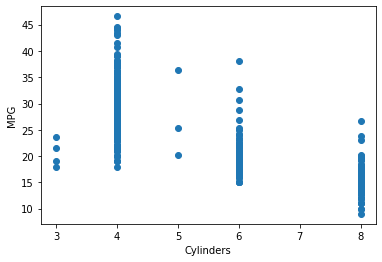

In [45]:
# Plot the cylinders & mpg to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(mpg['cylinders'], mpg['mpg'])
plt.xlabel("Cylinders")
plt.ylabel("MPG")
### END SOLUTION

Text(0, 0.5, 'MPG')

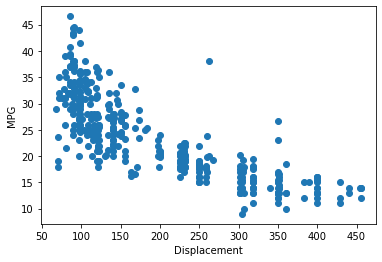

In [46]:
# Plot the displacement & mpg to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(mpg['displacement'], mpg['mpg'])
plt.xlabel("Displacement")
plt.ylabel("MPG")
### END SOLUTION

Text(0, 0.5, 'MPG')

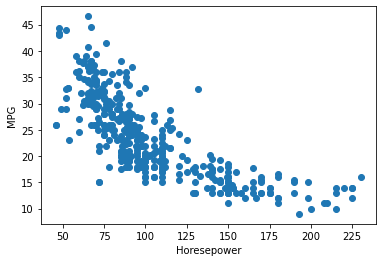

In [47]:
# Plot the horesepower & mpg to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(mpg['horsepower'], mpg['mpg'])
plt.xlabel("Horesepower")
plt.ylabel("MPG")
### END SOLUTION

Text(0, 0.5, 'MPG')

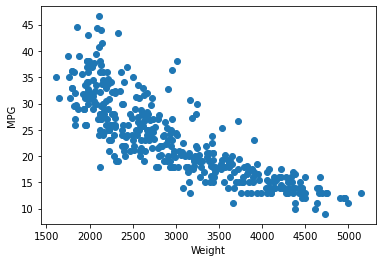

In [48]:
# Plot the weight & mpg to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(mpg['weight'], mpg['mpg'])
plt.xlabel("Weight")
plt.ylabel("MPG")
### END SOLUTION

Text(0, 0.5, 'MPG')

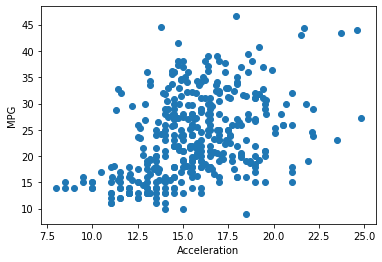

In [49]:
# Plot the acceleration & mpg to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(mpg['acceleration'], mpg['mpg'])
plt.xlabel("Acceleration")
plt.ylabel("MPG")
### END SOLUTION

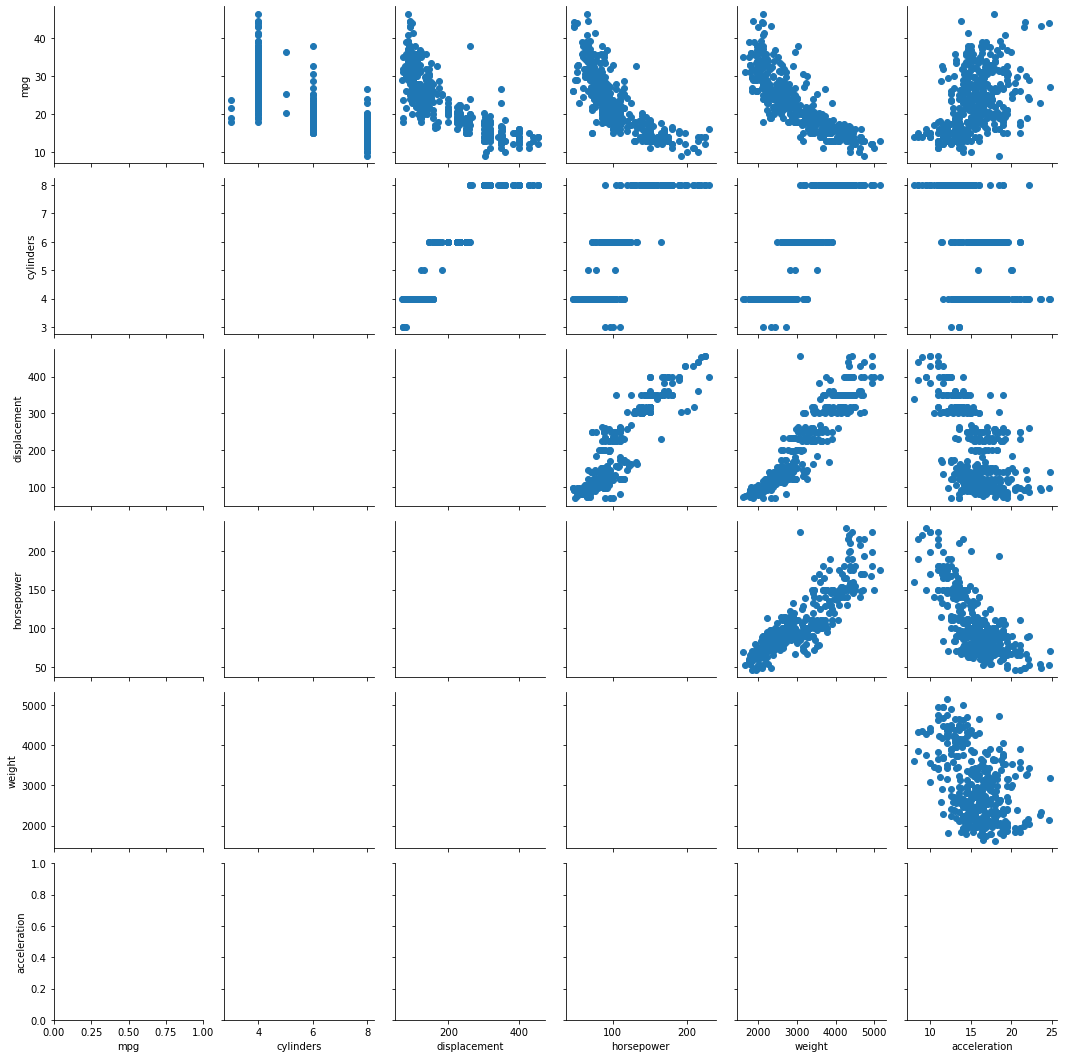

In [50]:
# Correlation Matrix to make all scatter plots at once

# importing seaborn package
import seaborn
  
# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
seaborn.PairGrid(mpg).map_upper(plt.scatter)

In [51]:
# Assign the variable to X that appears to have the most linear relationship with mpg
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

# Original X array was just 'weight'
# X = mpg["weight"].values.reshape(-1, 1)

# Added new X array that includes all the variables
X = mpg.drop("mpg", axis=1)
y = mpg["mpg"]

print("Shape: ", X.shape, y.shape)

Shape:  (392, 5) (392,)


In [52]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [53]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [54]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression()

In [55]:
# save model object as joblib file (to same location as this notebook)
# more efficient than pickle in some circumstance
from joblib import dump, load
dump(model, 'model_linregress_2022081800.joblib') 

['model_linregress_2022081800.joblib']

In [56]:
# open joblib file
model = load('model_linregress_2022081800.joblib')

In [57]:
# Alternative method of saving a model
# Saving models - https://scikit-learn.org/stable/model_persistence.html
import pickle
pickle.dump(model, open('model_linregress_2022081800.pkl', 'wb'))

In [58]:
# open pickle file
model = pickle.load(open('model_linregress_2022081800.pkl', 'rb'))

In [59]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### END SOLUTION

mean squared error (MSE): 17.156479228880194
R-squared (R2): 0.6598171624711537


In [60]:
# Call the `score()` method on the model to show the R2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.6598171624711537